In [ ]:
!pip install google-api-python-client



In [ ]:
import googleapiclient.discovery
import pandas as pd

api_service_name = "youtube"
api_version = "v3"
DEVELOPER_KEY = "-"# Replace with your actual YouTube Data API key

youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=DEVELOPER_KEY)

comments = []
video_id = "mAeOp87hXks"
next_page_token = None

while True:
    request = youtube.commentThreads().list(
        part="snippet",
        videoId=video_id,
        maxResults=100,
        pageToken=next_page_token
    )
    response = request.execute()

    for item in response['items']:
        comment = item['snippet']['topLevelComment']['snippet']
        comments.append([
            comment['authorDisplayName'],
            comment['publishedAt'],
            comment['updatedAt'],
            comment['likeCount'],
            comment['textDisplay']
        ])

    # Check if there is another page
    next_page_token = response.get('nextPageToken')
    if not next_page_token:
        break

# Turn into DataFrame
df = pd.DataFrame(comments, columns=['author', 'published_at', 'updated_at', 'like_count', 'text'])

# Sort by like count if you want to see the most-liked comments first
df = df.sort_values(by='like_count', ascending=False)

# Show top 10 comments by likes
print(df.head(10))


              author          published_at            updated_at  like_count  \
5612     @t.aiinsley  2025-05-11T18:47:40Z  2025-05-11T18:47:40Z       18968   
5671       @armycorp  2025-05-11T18:35:54Z  2025-05-11T18:35:54Z       18553   
6151     @emibee3335  2025-05-11T16:52:39Z  2025-05-11T16:52:39Z       15217   
5355          @TA804  2025-05-11T19:58:21Z  2025-05-11T19:58:21Z       14179   
5400         @khabba  2025-05-11T19:43:14Z  2025-05-11T19:43:14Z        8194   
6319   @awakenmylov3  2025-05-11T16:24:02Z  2025-05-11T16:24:02Z        7941   
6374  @animemugenbox  2025-05-11T16:10:34Z  2025-05-11T16:10:34Z        5985   
3522        @sch3107  2025-05-12T08:11:04Z  2025-05-12T08:11:04Z        5886   
4366    @maddygreers  2025-05-12T00:51:08Z  2025-05-13T03:02:04Z        5682   
5707      @YahhSirio  2025-05-11T18:27:59Z  2025-05-11T18:27:59Z        4972   

                                                   text  
5612  These debates have made it so clear that regar...  
567

In [6]:
print(df['text'][0])
#prints text as single line

Why do I feel like 95% of these people are closeted with internalized homophobia lol


In [7]:
df.to_csv("LGBTvsConservatives.csv", index=False, encoding='utf-8-sig')


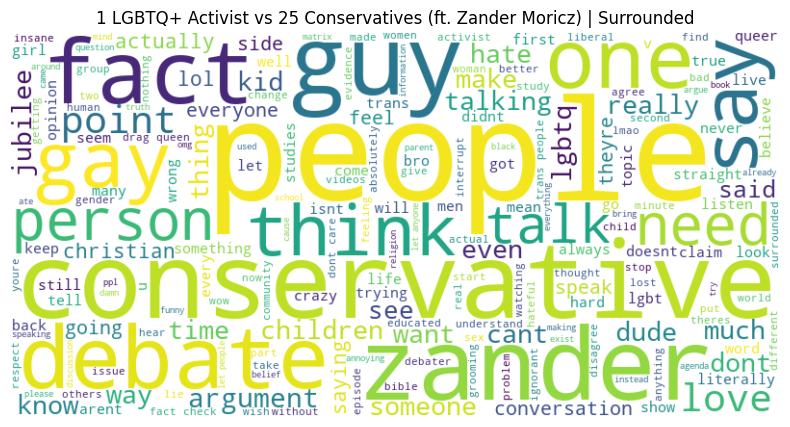

In [ ]:
# make wordcloud

!pip install wordcloud


import re
from wordcloud import STOPWORDS

text = ' '.join(df['text'].astype(str).tolist())

text = re.sub(r'[^A-Za-z\s]', '', text)

text = text.lower()

custom_stopwords = {"video", "youtube", "link", "watch", "comment", "subscribe", "channel", "href", 
                    "https", "www", "com", "you", "im", "yet", 
                    "hrefhttpswwwyoutubecomwatchvmaeophxksampta", "thats", 
                    "use", "lot", "hes"}
stopwords = STOPWORDS.union(custom_stopwords)

text = ' '.join(word for word in text.split() if word not in stopwords)


from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("1 LGBTQ+ Activist vs 25 Conservatives (ft. Zander Moricz) | Surrounded")
plt.show()

In [ ]:
import googleapiclient.discovery
import pandas as pd

api_service_name = "youtube"
api_version = "v3"
DEVELOPER_KEY =   # Make sure `dev` is your actual API key

youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=DEVELOPER_KEY)

comments = []
video_id = "qkzyjGpoLzQ"
next_page_token = None

while True:
    request = youtube.commentThreads().list(
        part="snippet",
        videoId=video_id,
        maxResults=100,
        pageToken=next_page_token
    )
    response = request.execute()

    for item in response['items']:
        comment = item['snippet']['topLevelComment']['snippet']
        comments.append([
            comment['authorDisplayName'],
            comment['publishedAt'],
            comment['updatedAt'],
            comment['likeCount'],
            comment['textDisplay']
        ])

    # Check if there is another page
    next_page_token = response.get('nextPageToken')
    if not next_page_token:
        break

# Turn into DataFrame
df = pd.DataFrame(comments, columns=['author', 'published_at', 'updated_at', 'like_count', 'text'])

# Sort by like count if you want to see the most-liked comments first
df = df.sort_values(by='like_count', ascending=False)

# Show top 10 comments by likes
print(df.head(10))


                           author          published_at            updated_at  \
4826         @baltazarcaceros3260  2025-04-13T20:30:39Z  2025-04-13T20:30:39Z   
5276             @Christian-ut2sp  2025-04-13T16:06:48Z  2025-04-13T16:06:48Z   
5202  @christopherroblodowski6699  2025-04-13T16:38:14Z  2025-04-13T16:38:14Z   
5240                 @Ahmed-z2w6i  2025-04-13T16:21:12Z  2025-04-13T16:21:12Z   
5139         @BroccoliAndCheese01  2025-04-13T17:08:35Z  2025-04-13T17:11:17Z   
5285                  @itzpaige__  2025-04-13T16:04:45Z  2025-04-13T16:04:45Z   
2436               @codydymco1215  2025-04-14T23:52:36Z  2025-04-14T23:52:36Z   
5194             @mountainsky4279  2025-04-13T16:42:43Z  2025-04-14T02:24:43Z   
5279                     @msj7668  2025-04-13T16:05:57Z  2025-04-13T16:08:14Z   
5151                   @illmosity  2025-04-13T17:02:25Z  2025-04-13T17:02:25Z   

      like_count                                               text  
4826       32004       Charles Barkley

In [13]:
df.to_csv("SportsvsFan.csv", index=False, encoding='utf-8-sig')


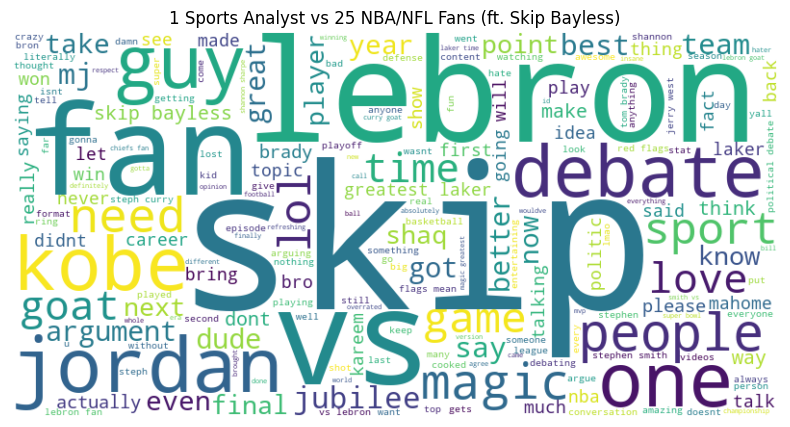

In [18]:
# make wordcloud

!pip install wordcloud


import re
from wordcloud import STOPWORDS

text = ' '.join(df['text'].astype(str).tolist())

text = re.sub(r'[^A-Za-z\s]', '', text)

text = text.lower()

custom_stopwords = {"video", "youtube", "link", "watch", "comment", "subscribe", "channel", "href", "https", "www", "com", "you", "im", "yet", "hrefhttpswwwyoutubecomwatchvqkzyjgpolzqampta", "thats", "use", "lot", "hes", "v", "cant"}
stopwords = STOPWORDS.union(custom_stopwords)

text = ' '.join(word for word in text.split() if word not in stopwords)


from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("1 Sports Analyst vs 25 NBA/NFL Fans (ft. Skip Bayless)")
plt.show()

In [ ]:
import googleapiclient.discovery
import pandas as pd

api_service_name = "youtube"
api_version = "v3"
DEVELOPER_KEY =   # Make sure `dev` is your actual API key

youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=DEVELOPER_KEY)

comments = []
video_id = "o69BiOqY1Ec"
next_page_token = None

while True:
    request = youtube.commentThreads().list(
        part="snippet",
        videoId=video_id,
        maxResults=100,
        pageToken=next_page_token
    )
    response = request.execute()

    for item in response['items']:
        comment = item['snippet']['topLevelComment']['snippet']
        comments.append([
            comment['authorDisplayName'],
            comment['publishedAt'],
            comment['updatedAt'],
            comment['likeCount'],
            comment['textDisplay']
        ])

    # Check if there is another page
    next_page_token = response.get('nextPageToken')
    if not next_page_token:
        break

# Turn into DataFrame
df = pd.DataFrame(comments, columns=['author', 'published_at', 'updated_at', 'like_count', 'text'])

# Sort by like count if you want to see the most-liked comments first
df = df.sort_values(by='like_count', ascending=False)

# Show top 10 comments by likes
print(df.head(10))

                   author          published_at            updated_at  \
33447          @megan7506  2025-03-30T18:03:34Z  2025-03-30T18:03:34Z   
23882          @noshxhson  2025-03-31T09:00:29Z  2025-03-31T09:00:29Z   
34762         @DoctorMike  2025-03-30T16:12:28Z  2025-03-30T16:12:28Z   
18076  @peytondressor7313  2025-04-01T08:31:34Z  2025-04-01T09:33:06Z   
10342        @OscarThe419  2025-04-04T08:53:26Z  2025-04-04T08:53:26Z   
34666   @ManjapSinghRaina  2025-03-30T16:24:56Z  2025-03-30T16:24:56Z   
29490           @dvoid665  2025-03-30T22:21:36Z  2025-03-30T22:21:36Z   
24297             @mt3776  2025-03-31T07:20:33Z  2025-03-31T07:20:33Z   
21449           @ToboJobo  2025-03-31T16:33:16Z  2025-03-31T16:33:16Z   
10154          @vurity399  2025-04-04T13:55:34Z  2025-04-04T13:55:34Z   

       like_count                                               text  
33447      187628  Vaccines work so well that people forgot what ...  
23882      124937  This didn&#39;t feel like a debate,

In [20]:
df.to_csv("VaccinevsMike.csv", index=False, encoding='utf-8-sig')


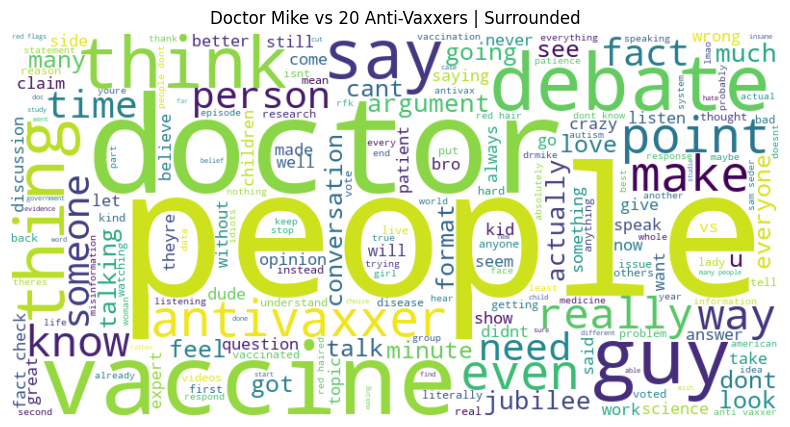

In [25]:
#make wordcloud

!pip install wordcloud


import re
from wordcloud import STOPWORDS

text = ' '.join(df['text'].astype(str).tolist())

text = re.sub(r'[^A-Za-z\s]', '', text)

text = text.lower()

custom_stopwords = {"video", "youtube", "link", "watch", "comment", "subscribe", "channel", "href", "https", "www", "com", "you", "im", "yet", "hrefhttpswwwyoutubecomwatchvobioqyecampta", "thats", "use", "lot", "hes", "v", "dr", "mike", "one", "lol"}
stopwords = STOPWORDS.union(custom_stopwords)

text = ' '.join(word for word in text.split() if word not in stopwords)


from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Doctor Mike vs 20 Anti-Vaxxers | Surrounded")
plt.show()

In [ ]:
import googleapiclient.discovery
import pandas as pd

api_service_name = "youtube"
api_version = "v3"
DEVELOPER_KEY = ""  # Make sure `dev` is your actual API key

youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=DEVELOPER_KEY)

comments = []
video_id = "Js15xgK4LIE"
next_page_token = None

while True:
    request = youtube.commentThreads().list(
        part="snippet",
        videoId=video_id,
        maxResults=100,
        pageToken=next_page_token
    )
    response = request.execute()

    for item in response['items']:
        comment = item['snippet']['topLevelComment']['snippet']
        comments.append([
            comment['authorDisplayName'],
            comment['publishedAt'],
            comment['updatedAt'],
            comment['likeCount'],
            comment['textDisplay']
        ])

    # Check if there is another page
    next_page_token = response.get('nextPageToken')
    if not next_page_token:
        break

# Turn into DataFrame
df = pd.DataFrame(comments, columns=['author', 'published_at', 'updated_at', 'like_count', 'text'])

# Sort by like count if you want to see the most-liked comments first
df = df.sort_values(by='like_count', ascending=False)

# Show top 10 comments by likes
print(df.head(10))

               author          published_at            updated_at  like_count  \
37536          @sl0ls  2025-03-09T22:58:21Z  2025-03-09T22:58:21Z      103787   
41454  @nahimgoodthxx  2025-03-09T17:18:07Z  2025-03-09T17:18:07Z       95223   
39604      @jack37133  2025-03-09T19:46:30Z  2025-03-09T19:46:30Z       72828   
27542         @Buq666  2025-03-10T16:49:05Z  2025-03-10T16:49:05Z       53027   
42049         @haltes  2025-03-09T16:07:52Z  2025-03-09T16:07:52Z       50298   
34652   @choerryIover  2025-03-10T03:34:13Z  2025-03-10T03:34:13Z       42990   
12763   @sheznotfunny  2025-03-12T15:28:35Z  2025-03-12T15:28:35Z       39524   
41626     @sarahj7225  2025-03-09T17:01:59Z  2025-03-09T17:01:59Z       35366   
40447    @natgeo61212  2025-03-09T18:35:31Z  2025-03-09T18:35:31Z       30339   
38773   @moises-cs7lk  2025-03-09T21:00:28Z  2025-03-09T21:00:28Z       29536   

                                                    text  
37536  We used to disagree on points of opinion, 

In [27]:
df.to_csv("SamSeder.csv", index=False, encoding='utf-8-sig')


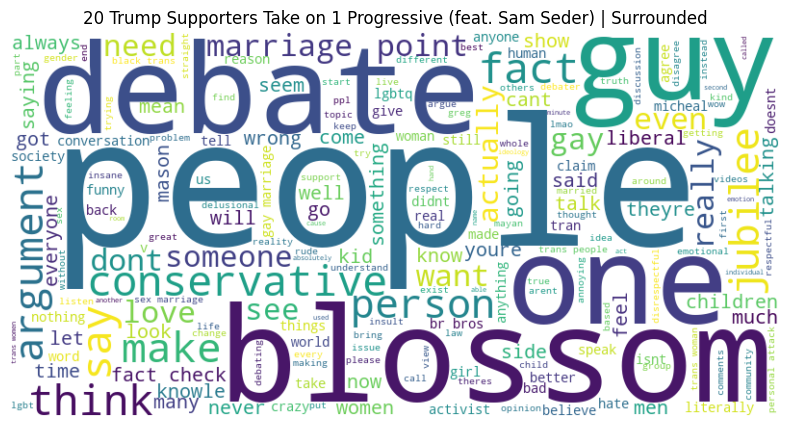

In [ ]:
#make wordcloud

!pip install wordcloud


import re
from wordcloud import STOPWORDS

text = ' '.join(df['text'].astype(str).tolist())

text = re.sub(r'[^A-Za-z\s]', '', text)

text = text.lower()

custom_stopwords = {"video", "youtube", "link", "watch", "comment", "subscribe", "channel", "href", "https", "www", "com", "you", "im", "yet", "hrefhttpswwwyoutubecomwatchvjsxgklieampta", "thats", "use", "lot", "hes", "u", "thing", "way", "lol", "sam", "seder", }
stopwords = STOPWORDS.union(custom_stopwords)

text = ' '.join(word for word in text.split() if word not in stopwords)


from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("20 Trump Supporters Take on 1 Progressive (feat. Sam Seder) | Surrounded")
plt.show()

In [ ]:

api_service_name = "youtube"
api_version = "v3"
DEVELOPER_KEY = ""  # Make sure `dev` is your actual API key

youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=DEVELOPER_KEY)

comments = []
video_id = "yBoFwaTWm70"
next_page_token = None

while True:
    request = youtube.commentThreads().list(
        part="snippet",
        videoId=video_id,
        maxResults=100,
        pageToken=next_page_token
    )
    response = request.execute()

    for item in response['items']:
        comment = item['snippet']['topLevelComment']['snippet']
        comments.append([
            comment['authorDisplayName'],
            comment['publishedAt'],
            comment['updatedAt'],
            comment['likeCount'],
            comment['textDisplay']
        ])

    # Check if there is another page
    next_page_token = response.get('nextPageToken')
    if not next_page_token:
        break

# Turn into DataFrame
df = pd.DataFrame(comments, columns=['author', 'published_at', 'updated_at', 'like_count', 'text'])

# Sort by like count if you want to see the most-liked comments first
df = df.sort_values(by='like_count', ascending=False)

# Show top 10 comments by likes
print(df.head(10))

                     author          published_at            updated_at  \
22036         @Juniorggomez  2025-02-16T22:06:04Z  2025-02-16T22:06:04Z   
22758    @johnathanyant7767  2025-02-16T20:13:09Z  2025-02-16T20:13:09Z   
21177          @toonsnooper  2025-02-16T23:59:38Z  2025-02-17T00:10:08Z   
23308        @jujutrini8412  2025-02-16T18:54:03Z  2025-02-16T18:54:03Z   
23924                @daph2  2025-02-16T17:04:59Z  2025-02-16T17:04:59Z   
17362           @gabepoirot  2025-02-17T14:09:27Z  2025-02-17T14:09:27Z   
23335         @UnfilteredWV  2025-02-16T18:51:25Z  2025-02-16T18:51:25Z   
21171            @DJWolford  2025-02-17T00:01:08Z  2025-02-17T00:01:08Z   
13197  @wesleyschumacher486  2025-02-18T13:18:18Z  2025-02-18T13:18:18Z   
14014             @JD-eq1gk  2025-02-18T06:35:41Z  2025-02-18T06:35:41Z   

       like_count                                               text  
22036       98626  If u want blossom voted off all future jubilee...  
22758       62448  Personal atta

In [33]:
df.to_csv("conservativevsLGBTQ.csv", index=False, encoding='utf-8-sig')


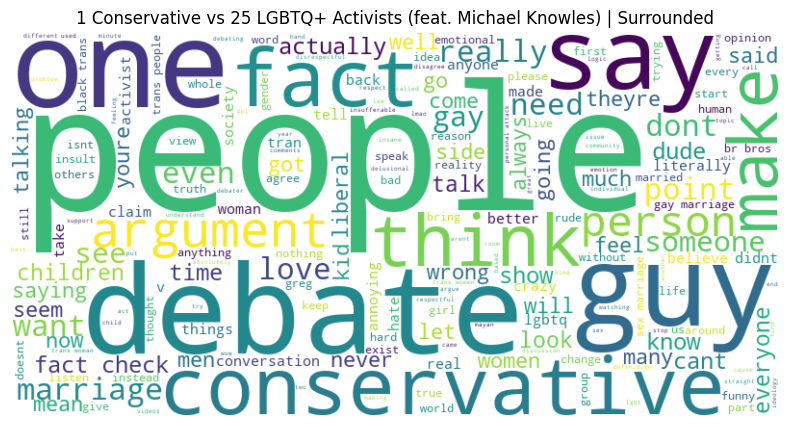

In [43]:
#make wordcloud

!pip install wordcloud


import re
from wordcloud import STOPWORDS

text = ' '.join(df['text'].astype(str).tolist())

text = re.sub(r'[^A-Za-z\s]', '', text)

text = text.lower()

custom_stopwords = {"video", "youtube", "link", "watch", "comment", "subscribe", "channel", "href", "https", "www", "com", "you", "im", "yet", "hrefhttpswwwyoutubecomwatchvybofwatwmampta", "thats", "use", "lot", "hes", "u", "thing", "way", "lol", "blossom", "mason", "micheal", "knowles", "knowle", "jubilee", "something", "theres"}
stopwords = STOPWORDS.union(custom_stopwords)

text = ' '.join(word for word in text.split() if word not in stopwords)


from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("1 Conservative vs 25 LGBTQ+ Activists (feat. Michael Knowles) | Surrounded")
plt.show()